In [1]:
import numpy as np 
import pandas as pd   

import yfinance as yf 

import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline

In [2]:
stocks = input("Enter the code of the stock:- ") 
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True) 
data.head()

Enter the code of the stock:- GC=F
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,848.700012,857.799988,846.400024,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,4
2008-01-08,861.599976,879.400024,861.599976,878.000000,21


In [3]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3281 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3281 non-null   float64
 1   High    3281 non-null   float64
 2   Low     3281 non-null   float64
 3   Close   3281 non-null   float64
 4   Volume  3281 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


,Open,High,Low,Close,Volume
count,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000
mean,1316.287291,1323.427614,1308.463700,1316.037885,5606.854008
std,262.732678,264.022456,261.294638,262.754237,29568.392331
min,705.000000,715.500000,681.000000,704.900024,0.000000
25%,1183.400024,1189.400024,1176.199951,1183.400024,41.000000
50%,1282.500000,1287.099976,1277.800049,1282.099976,137.000000
75%,1486.199951,1491.599976,1477.300049,1484.000000,442.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,386334.000000


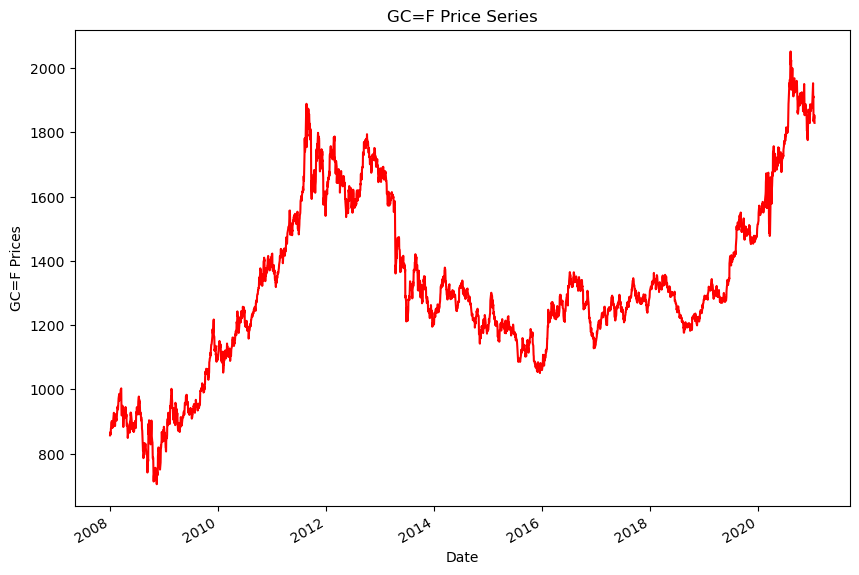

In [4]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

/var/folders/q9/s9ct6jh55234hxkjq0q6h5l00000gn/T/ipykernel_1893/2422862908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

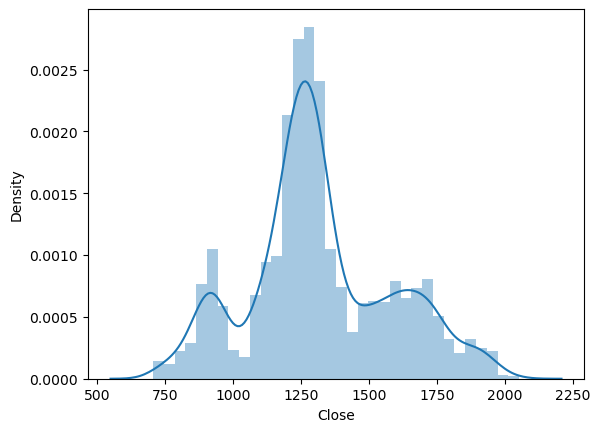

In [6]:
sns.distplot(data["Close"])


/var/folders/q9/s9ct6jh55234hxkjq0q6h5l00000gn/T/ipykernel_1893/3218051027.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<Axes: xlabel='Open', ylabel='Density'>

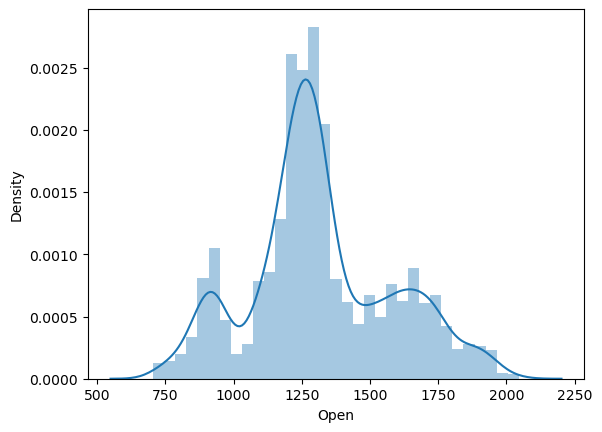

In [7]:
sns.distplot(data["Open"])

/var/folders/q9/s9ct6jh55234hxkjq0q6h5l00000gn/T/ipykernel_1893/2108203297.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: xlabel='High', ylabel='Density'>

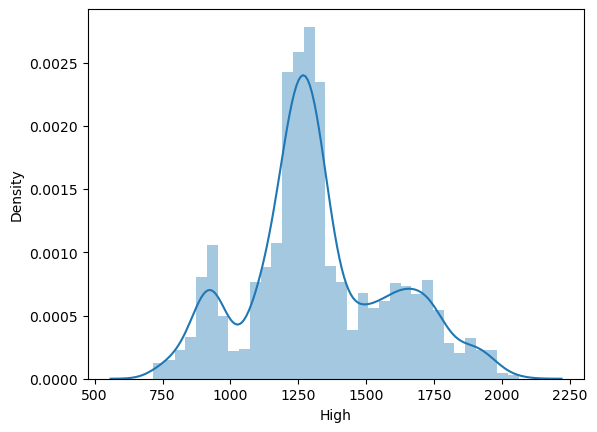

In [8]:

sns.distplot(data["High"])

In [9]:
X = data.drop("Close", axis=1) 
y = data["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(2624, 4)
(657, 4)
(2624,)
(657,)


In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred1 = lr.predict(X_test)


In [11]:
# MSE -- > Mean Squared  
# RMSE ---> sart(MSE) 
# r2_square ---> 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)


MSE:-  27.4723122989963
RMSE:-  5.24140365732275
R2_score:-  0.9995883344184746


In [12]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)


/Users/bibekkarki/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.847e+04, tolerance: 1.826e+04
  model = cd_fast.enet_coordinate_descent(


In [13]:
calculate_metrics(y_test, la_p)

MSE:-  46.19017534827889
RMSE:-  6.79633543523853
R2_score:-  0.9993078520224814
